<a href="https://colab.research.google.com/github/Yasna79/Challenge3_telecomX_Parte2/blob/main/Predicci%C3%B3n_de_Cancelaci%C3%B3n_(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [29]:
datos = pd  .read_csv('/content/datos_tratados.csv')

In [30]:
datos.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly,DailyCharges
0,0002-ORFBO,No,Female,0,1,1,9,1,0,One year,...,DSL,0,1,0,1,1,0,593.30,65.6,2.186667
1,0003-MKNFE,No,Male,0,0,0,9,1,1,Month-to-month,...,DSL,0,0,0,0,0,1,542.40,59.9,1.996667
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Month-to-month,...,Fiber optic,0,0,1,0,0,0,280.85,73.9,2.463333
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Month-to-month,...,Fiber optic,0,1,1,0,1,1,1237.85,98.0,3.266667
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Month-to-month,...,Fiber optic,0,0,0,1,1,0,267.40,83.9,2.796667


In [31]:
datos.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'ChargesTotal', 'ChargesMonthly',
       'DailyCharges'],
      dtype='object')

In [32]:
datos = datos.drop(columns=['CustomerID'])



####** Verificar correlación entre posibles columnas redundantes**

In [33]:
# Verificar correlación entre posibles columnas redundantes
datos[['ChargesMonthly', 'ChargesTotal', 'Tenure', 'DailyCharges']].corr()


,ChargesMonthly,ChargesTotal,Tenure,DailyCharges
ChargesMonthly,1.000000,0.652109,0.247982,1.000000
ChargesTotal,0.652109,1.000000,0.825118,0.652109
Tenure,0.247982,0.825118,1.000000,0.247982
DailyCharges,1.000000,0.652109,0.247982,1.000000


In [34]:
# Código para eliminar columna redundante
datos = datos.drop(columns=['DailyCharges'])


In [35]:
##Verificar cuántos NaN hay en Churn

print(datos['Churn'].isna().sum())



224


In [36]:
datos = datos.dropna(subset=['Churn'])


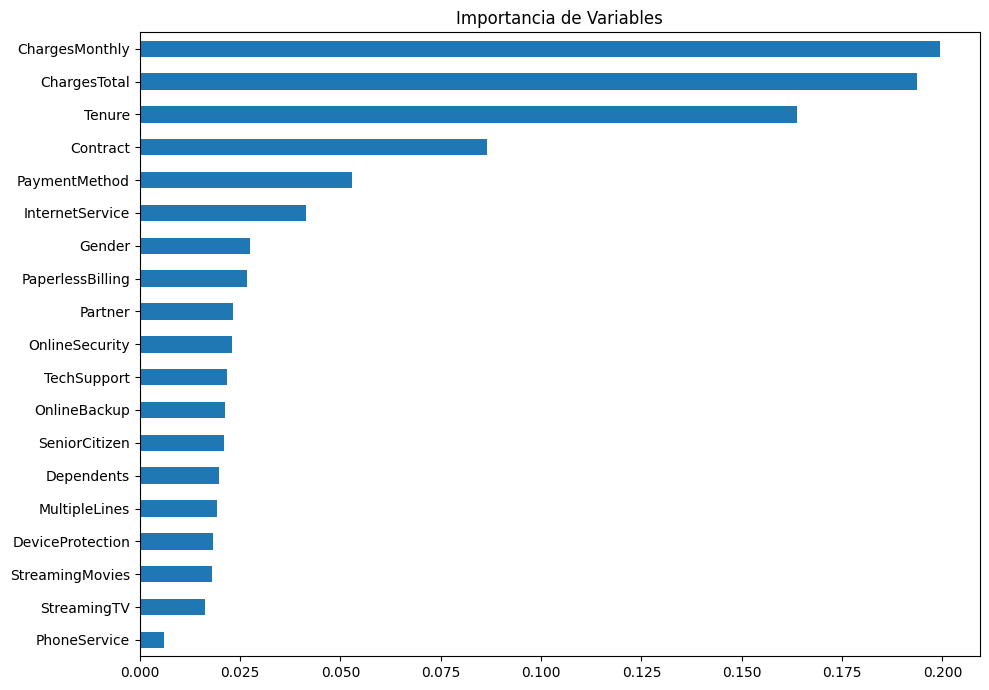

In [37]:
#  Convertir 'Churn' a binario (ajusta si los valores son otros)
datos['Churn'] = datos['Churn'].map({'Yes': 1, 'No': 0})

#  Codificar variables categóricas
for col in datos.select_dtypes(include='object').columns:
    datos[col] = LabelEncoder().fit_transform(datos[col])

#  Separar características y objetivo
X = datos.drop('Churn', axis=1)
y = datos['Churn']

#  Entrenar Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

#  Graficar importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 7), title='Importancia de Variables')
plt.tight_layout()
plt.show()



In [39]:
datos

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ChargesTotal,ChargesMonthly
0,0,0,0,1,1,9,1,0,1,1,3,0,0,1,0,1,1,0,593.30,65.60
1,0,1,0,0,0,9,1,1,0,0,3,0,0,0,0,0,0,1,542.40,59.90
2,1,1,0,0,0,4,1,0,0,1,2,1,0,0,1,0,0,0,280.85,73.90
3,1,1,1,1,0,13,1,0,0,1,2,1,0,1,1,0,1,1,1237.85,98.00
4,1,0,1,1,0,3,1,0,0,1,3,1,0,0,0,1,1,0,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,0,13,1,0,1,0,3,0,1,0,0,1,0,0,742.90,55.15
7263,1,1,0,1,0,22,1,1,0,1,2,1,0,0,0,0,0,1,1873.70,85.10
7264,0,1,0,0,0,2,1,0,0,1,3,0,0,1,0,0,0,0,92.75,50.30
7265,0,1,0,1,1,67,1,0,2,0,3,0,1,0,1,1,0,1,4627.65,67.85
